The goal of this project is to analysing the Boston dataset using the CRISP-DM methods, we will try to answer some questions 
The method to follow is <br>
1 - Business understanding <br>
2 - Data understanding <br>
3 - Data preparation <br>
4 - Modeling <br>
5 - Evaluation <br>
6 - Processing <br>

## A look at the data

 Import all necessary libraries.

In [7]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Read all the dataset we've export
## A look at the data

 Read all the data with right separator and pandas.

In [8]:
calendar = pd.read_csv('calendar.csv', sep=',')
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

## I - Listings dataset analysis
**1.** Let's analyse listings dataset to see columns and values

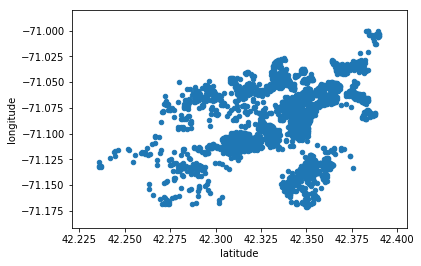

In [37]:
#get a look to the listing data
listings.plot(kind = 'scatter', x='latitude', y='longitude')

**3.** get a look on dataframe number of columns and rows 
we will use this quite a lot so let's create a function

In [10]:
len(list(set(listings['id'])))

3585

In [11]:
def get_dataframe_info(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of row
    and columns of the dataframe

    '''
    print('number of rows of dataframe: {} \n'.format(dataframe.shape[0]))
    print('number of columns of  dataframe: {} \n'.format(dataframe.shape[1]))

In [12]:
get_dataframe_info(listings)

number of rows of dataframe: 3585 

number of columns of  dataframe: 95 



**4.** get a look to categorical and numerical columns
create a function for that also

In [13]:
def get_dataframe_categorie(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of
    categorical and numerical
    variables

    '''
    numerical_dataframe = dataframe.select_dtypes(include=['number'])
    categorical_dataframe = dataframe.select_dtypes(exclude=['number'])
    print('number of numerical columns: {} \n'.format(numerical_dataframe.shape[1]))
    print('number of categorical columns: {} \n'.format(categorical_dataframe.shape[1]))

In [65]:
get_dataframe_categorie(listings)

number of numerical columns: 33 

number of categorical columns: 62 



**5.** get infos about missing values
we will use this quite a lot so let's create a function

In [68]:
def get_info_missing_values(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    print the missing values ratio
    for each column of the dataframe

    '''
    print(dataframe.isnull().mean().sort_values(ascending=False))

**6.** get columns with a certain percetange of missing values

In [69]:
get_info_missing_values(listings)

neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
has_availability                    1.000000
square_feet                         0.984379
monthly_price                       0.752301
weekly_price                        0.751185
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_sco

In [ ]:
#get columns with entire missing values
missing_columns = listings.columns[listings.isnull().mean()==1]
print('colums with no values \n {} '.format(missing_columns))

In [ ]:
# get a look at these columns data

listings_data = listings[missing_columns]
listings_data.head()

We got no data at all for these columns so are they relevants no, they dont give many informations
in the dataset, we can delete them

In [ ]:
#delete theses columns
listings = listings.drop(list(missing_columns), axis=1)

In [ ]:
# get the columns with no missing values
clean_columns = listings.columns[listings.isnull().mean()==0]
print('colums with no missings \n {} '.format(clean_columns))

In [ ]:
# get the numeric variables from listing dataset
num_vars = listings.select_dtypes(include=['number'])
print('numbers of numerical variables are {} \n'.format(len(num_vars.columns)))

# get the categorical variables from dataset
cat_vars = listings.select_dtypes(exclude=['number'])
print('numbers of categorical variables are {} \n'.format(len(cat_vars.columns)))

Let's have a view on the experience offered repartition

In [ ]:
# print all columns from the dataset
print(listings.columns,'\n')

#get the number of missing values in  property type
print('mean of listings missing {} \n'.format(listings['property_type'].isnull().mean()))


we can see that only few values is missing so hot always enter the type of the house
Let's get a look on listings type repartition

In [ ]:
# get the number of property type missing in the dataset
property_type = listings['property_type'].value_counts()
(property_type/listings.shape[0]).plot(kind='bar');
plt.title('Type of listing demanded');

We can see that the most demanded type of listings is Appartment, people like to book most of the time appartmets (70%), houses come in second 

In [ ]:
# plot histogram for all the numeric values of listings
listings.hist(bins=50,figsize=((20,15)))

when analysing the hist from numerical variables, we can see that many things
- many of houses has 2 accomodates (kind of appartments)
- most of the listings have one bedroom
- 

## II - Reviews dataset analysis
**1.** Let's analyse reviews dataset to see columns and values

In [16]:
reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


**2.** adding month to reviews

In [88]:
import datetime
def adding_month(value):
    """ adding the month
    to the dataframe
    """
    months = ['Jan', 'Fev',
              'Mar','Apr',
              'May', 'Jun',
             'Jul', 'Aug',
              'Sep','Oct', 
              'Nov', 'Dec']
    value_converted = datetime.datetime.strptime(value, '%Y-%m-%d')
    return months[value_converted.month-1]

reviews['months'] = reviews['date'].apply(adding_month)

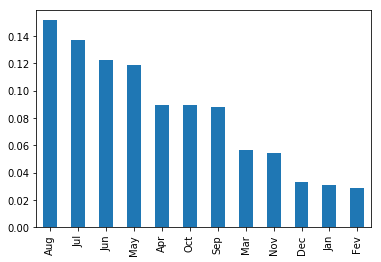

In [89]:
(reviews['months'].value_counts()/reviews.shape[0]).plot(kind = 'bar')

We noticed that people use to book the houses in the summer (month of Aug, July, June, May), few people booked in Dec, Janv, Fev because of the coolness perhaps

In [14]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [27]:
get_dataframe_info(calendar)

number of rows of dataframe: 1308890 

number of columns of  dataframe: 4 



In [28]:
calendar_group = calendar.groupby('listing_id')

In [29]:
e = calendar_group.first()

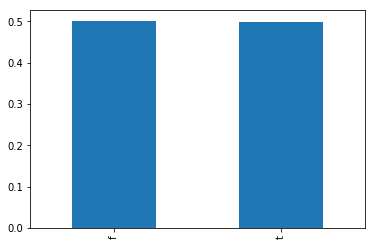

In [30]:
(e['available'].value_counts()/e.shape[0]).plot(kind='bar')

## 